In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import torch 
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from torch.optim import SGD
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import shap
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
data = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
data.shape

(110527, 14)

In [9]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# preprocessing

In [10]:
data[['PatientId', 'No-show']].duplicated().sum()

38710

In [11]:
data.drop_duplicates(['PatientId', 'No-show'],inplace=True)

Text(0.5, 1.0, 'Correlation Heatmap')

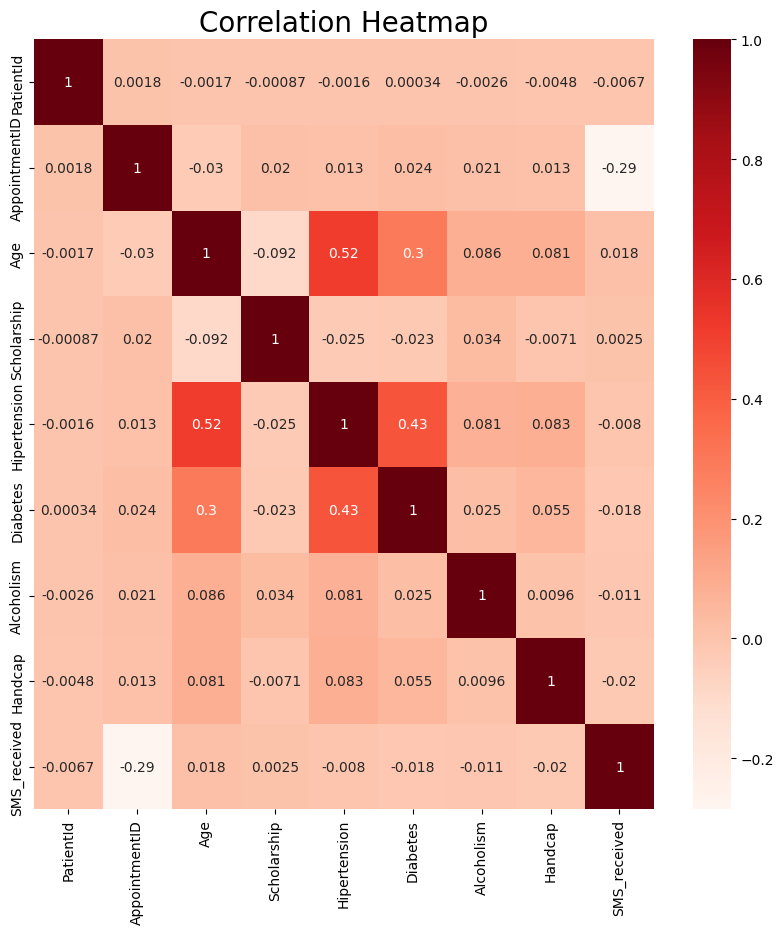

In [12]:
corr=data.corr(numeric_only=True)

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [13]:
data.query("Age == -1")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
data[data['Age'] == 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110299,5.944513e+10,5746323,F,2016-05-30T13:47:40Z,2016-06-07T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,1,Yes
110313,8.535734e+12,5600209,F,2016-04-19T10:09:05Z,2016-06-06T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,1,No
110321,1.388630e+11,5338643,M,2016-02-11T16:14:32Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,1,No
110331,2.739486e+13,5392089,F,2016-02-24T15:33:08Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,1,Yes


In [15]:
data.drop(data[data['Age'] == -1].index, inplace=True)

In [16]:
data = data.drop(["PatientId", "AppointmentID"], axis=1)

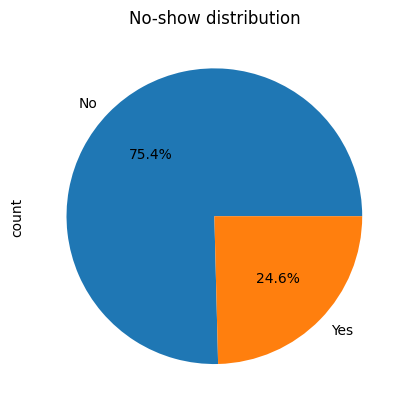

In [17]:
data["No-show"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("No-show distribution");

In [18]:
data["ScheduledDay"] = pd.to_datetime(data["ScheduledDay"])

In [19]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
data["AppointmentDay"] = pd.to_datetime(data["AppointmentDay"])

In [21]:
data["delta"] = data["AppointmentDay"].sub(data["ScheduledDay"]).dt.days+1
data["delta"]

0          0
1          0
2          0
3          0
4          0
          ..
110518    41
110520    35
110521    35
110522    35
110524    41
Name: delta, Length: 71816, dtype: int64

In [22]:
data[data["delta"] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,delta
27033,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
72362,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [23]:
data.drop(data[data["delta"]==-1].index,inplace=True)

In [24]:
data = data.drop(["ScheduledDay", "AppointmentDay"], axis=1)

In [25]:
data['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [26]:
data['Gender'].unique

<bound method Series.unique of 0         F
1         M
2         F
3         F
4         F
         ..
110518    F
110520    F
110521    F
110522    F
110524    F
Name: Gender, Length: 71814, dtype: object>

In [27]:
data = data.drop(['Neighbourhood'], axis=1)

In [28]:
data.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,delta
0,F,62,0,1,0,0,0,0,No,0
1,M,56,0,0,0,0,0,0,No,0
2,F,62,0,0,0,0,0,0,No,0
3,F,8,0,0,0,0,0,0,No,0
4,F,56,0,1,1,0,0,0,No,0


In [29]:
gender_mapping = {'F': 0, 'M': 1}
data['Gender'] = data['Gender'].map(gender_mapping)
print(data)

        Gender  Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0            0   62            0             1         0           0        0   
1            1   56            0             0         0           0        0   
2            0   62            0             0         0           0        0   
3            0    8            0             0         0           0        0   
4            0   56            0             1         1           0        0   
...        ...  ...          ...           ...       ...         ...      ...   
110518       0   50            0             0         0           0        0   
110520       0   42            0             0         0           0        0   
110521       0   53            0             0         0           0        0   
110522       0   56            0             0         0           0        0   
110524       0   21            0             0         0           0        0   

        SMS_received No-sho

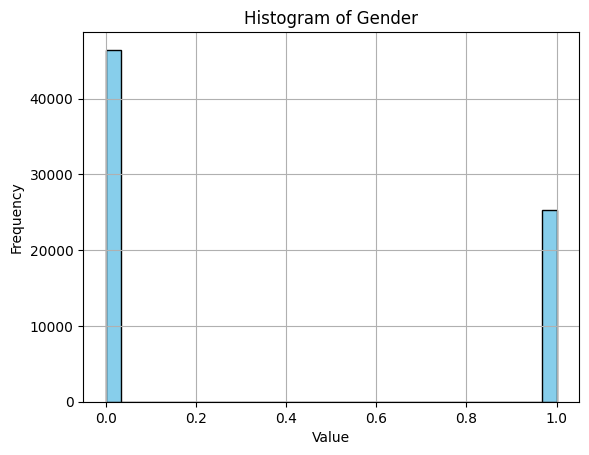

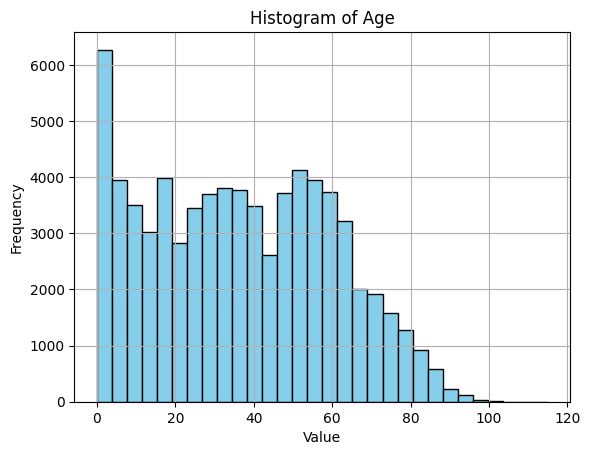

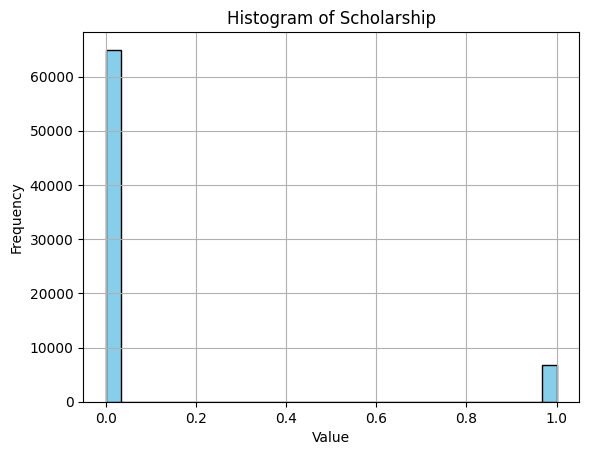

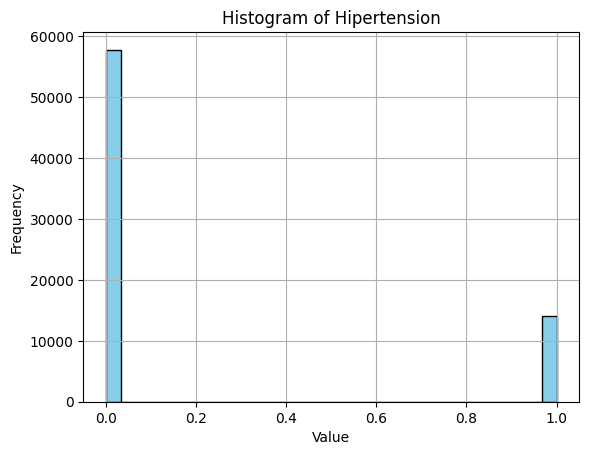

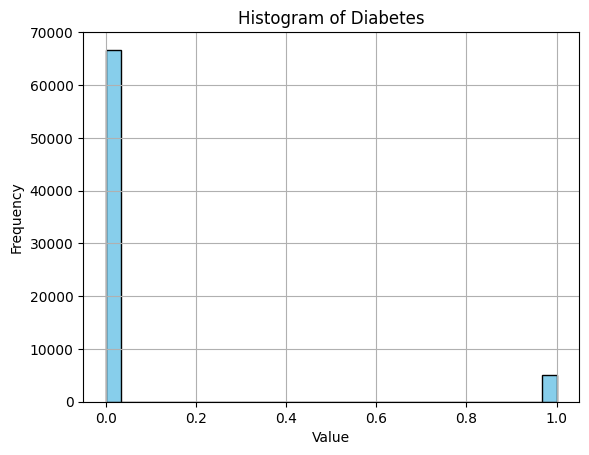

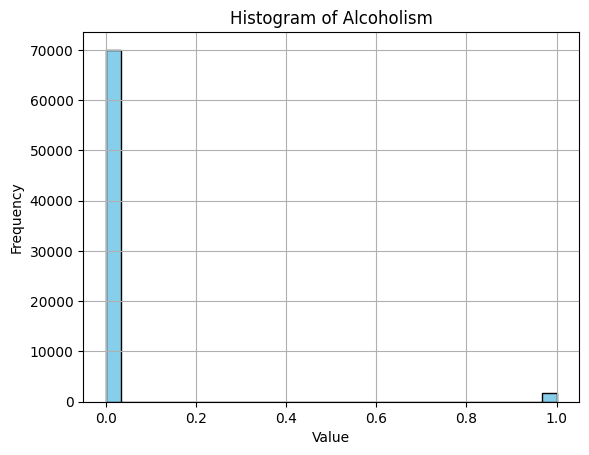

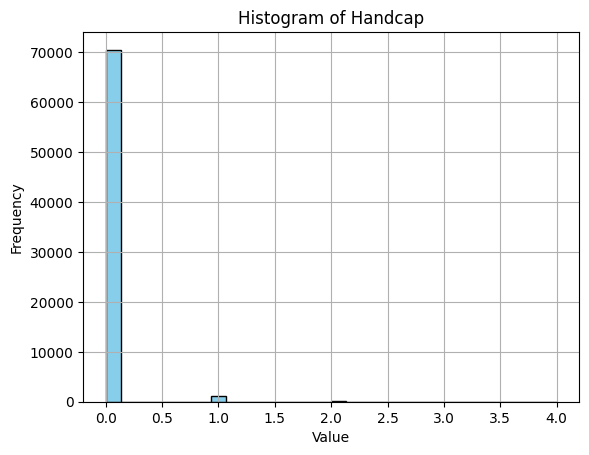

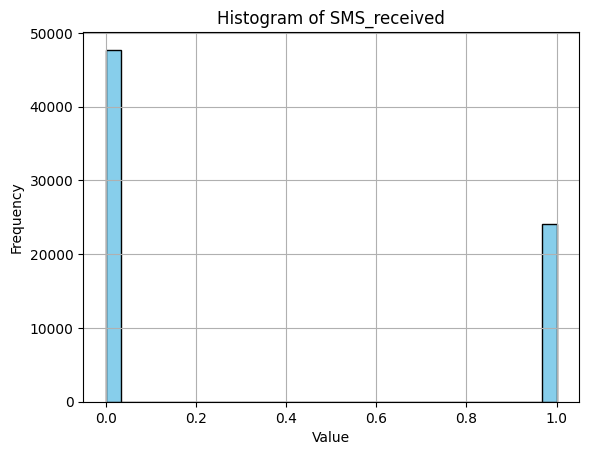

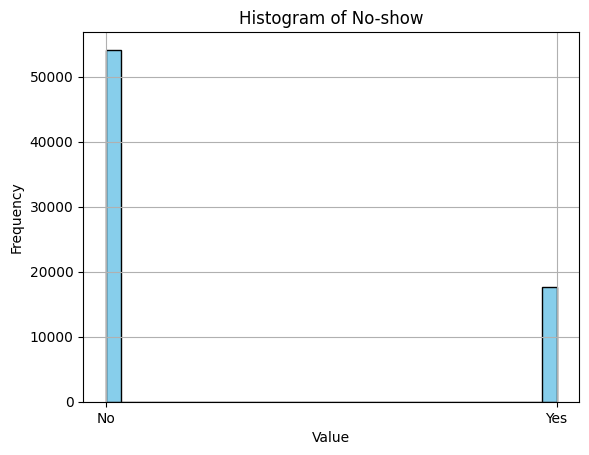

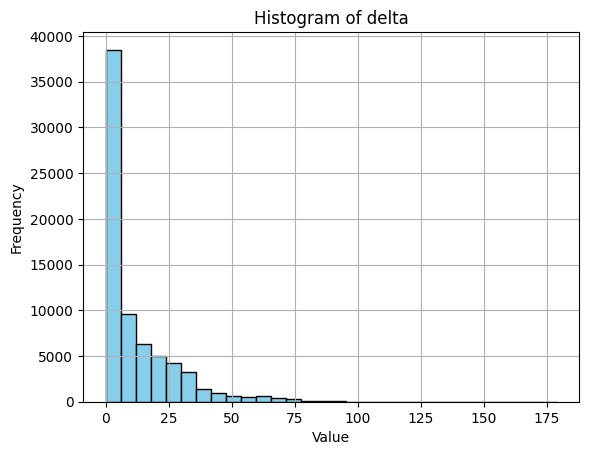

In [30]:
for column in data.columns:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.show()


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71814 entries, 0 to 110524
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        71814 non-null  int64 
 1   Age           71814 non-null  int64 
 2   Scholarship   71814 non-null  int64 
 3   Hipertension  71814 non-null  int64 
 4   Diabetes      71814 non-null  int64 
 5   Alcoholism    71814 non-null  int64 
 6   Handcap       71814 non-null  int64 
 7   SMS_received  71814 non-null  int64 
 8   No-show       71814 non-null  object
 9   delta         71814 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 6.0+ MB


In [32]:
data['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
noshow_mapping = {'No': 0, 'Yes': 1}
data['No-show'] = data['No-show'].map(noshow_mapping)
print(data)

        Gender  Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0            0   62            0             1         0           0        0   
1            1   56            0             0         0           0        0   
2            0   62            0             0         0           0        0   
3            0    8            0             0         0           0        0   
4            0   56            0             1         1           0        0   
...        ...  ...          ...           ...       ...         ...      ...   
110518       0   50            0             0         0           0        0   
110520       0   42            0             0         0           0        0   
110521       0   53            0             0         0           0        0   
110522       0   56            0             0         0           0        0   
110524       0   21            0             0         0           0        0   

        SMS_received  No-sh

In [34]:
data.shape

(71814, 10)

# Model


In [35]:
X = data.drop(columns=['No-show'])
y = data['No-show'] 
train_ratio = 0.7  # Percentage of data for training
val_ratio = 0.1    # Percentage of data for validation
test_ratio = 0.2   # Percentage of data for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50269, 9)
y_train shape: (50269,)
X_val shape: (7182, 9)
y_val shape: (7182,)
X_test shape: (14363, 9)
y_test shape: (14363,)


Epoch 1/20, Train Loss: 0.17679216381083926, Val Loss: 0.17096742781176505
Epoch 2/20, Train Loss: 0.17359121805861177, Val Loss: 0.17028892350870778
Epoch 3/20, Train Loss: 0.1732142789271162, Val Loss: 0.17350573296509753
Epoch 4/20, Train Loss: 0.17342989833711991, Val Loss: 0.17093488522569575
Epoch 5/20, Train Loss: 0.17313939194203884, Val Loss: 0.17020258733441568
Epoch 6/20, Train Loss: 0.1732891578042829, Val Loss: 0.1711361702044744
Epoch 7/20, Train Loss: 0.17318249590428564, Val Loss: 0.17060007186376858
Epoch 8/20, Train Loss: 0.17312452074205303, Val Loss: 0.1707341035498987
Epoch 9/20, Train Loss: 0.17307314424879827, Val Loss: 0.1709035280906481
Epoch 10/20, Train Loss: 0.17349083478358907, Val Loss: 0.17094823271752002
Epoch 11/20, Train Loss: 0.173219641362929, Val Loss: 0.17095751587223942
Epoch 12/20, Train Loss: 0.17333103549691734, Val Loss: 0.170464545374236
Epoch 13/20, Train Loss: 0.17317312910562058, Val Loss: 0.17064179559027196
Epoch 14/20, Train Loss: 0.173

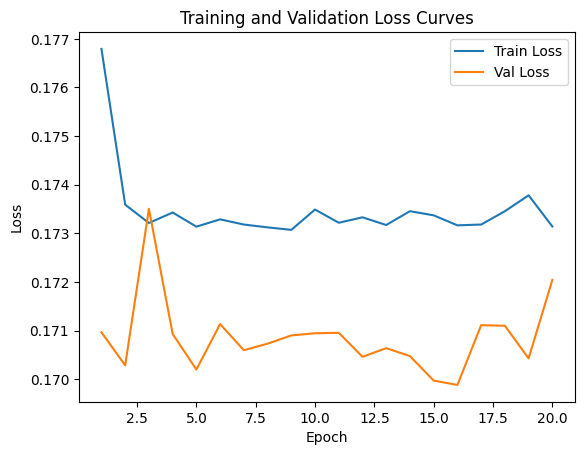

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to('cpu')
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to('cpu')
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to('cpu')
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to('cpu')

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
num_epochs = 20


#ReLU activatoin function
class TabularClassifier(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),         # Use sigmoid activation function
            nn.Dropout(p=0.2),
            nn.Linear(512, 128),
            nn.ReLU(),         # Use sigmoid activation function
            nn.Dropout(p=0.2),
            nn.Linear(128, 1)
        )

#sigmoid activation function
# class TabularClassifier(nn.Module):
#     def __init__(self, input_size):
#         super().__init__()
#         self.model = nn.Sequential(
#             nn.Linear(input_size, 512),
#             nn.Sigmoid(),      # Use sigmoid activation function
#             nn.Dropout(p=0.2),
#             nn.Linear(512, 128),
#             nn.Sigmoid(),      # Use sigmoid activation function
#             nn.Dropout(p=0.2),
#             nn.Linear(128, 1)
#         )


    
#tanh
# class TabularClassifier(nn.Module):
#     def __init__(self, input_size):
#         super().__init__()
#         self.model = nn.Sequential(
#             nn.Linear(input_size, 512),
#             nn.Tanh(),         # Use tanh activation function
#             nn.Dropout(p=0.2),
#             nn.Linear(512, 128),
#             nn.Tanh(),         # Use tanh activation function
#             nn.Dropout(p=0.2),
#             nn.Linear(128, 1)
#         )


        
    def forward(self, x):
        return self.model(x)
    
input_size = X_train.shape[1] 


clf = TabularClassifier(input_size).to('cpu')
loss_fn = nn.MSELoss()
weight_decay = 0.01  

#optimizer
optimizer = Adam(clf.parameters(), lr=0.001, weight_decay=weight_decay)  # Adam optimizer
#optimizer = SGD(clf.parameters(), lr=0.0001, weight_decay=weight_decay)  # SGD optimizer

# Training loop with loss recording
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    clf.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to('cpu'), y_batch.to('cpu')

        optimizer.zero_grad()
        y_pred = clf(X_batch)
        loss = loss_fn(y_pred.squeeze(), y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * X_batch.size(0)

    avg_train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)

    clf.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to('cpu'), y_batch.to('cpu')

            y_pred = clf(X_batch)
            val_loss += loss_fn(y_pred.squeeze(), y_batch).item() * X_batch.size(0)

    avg_val_loss = val_loss / len(test_loader.dataset)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

# Plot the loss curves
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

In [37]:
clf = TabularClassifier(input_size=X_train.shape[1]).to('cpu')
param_grid = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [0.001, 0.01, 0.0001],
    'clf__solver': ['liblinear', 'saga']
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

C:\Users\Shadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

Best Parameters: {'clf__C': 0.0001, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best Score: 0.7525910604965357
Test Accuracy: 0.7565271879133886


In [38]:
def evaluate_model_classification(model, data_loader, activation_fn):
    model.eval()
    predictions = []
    targets = []

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to('cpu'), y_batch.to('cpu')
            y_pred = activation_fn(model(X_batch))
            _, predicted = torch.max(y_pred, 1)  
            predictions.extend(predicted.tolist())
            targets.extend(y_batch.tolist())

    accuracy = accuracy_score(targets, predictions)
    precision = precision_score(targets, predictions, average='weighted')
    recall = recall_score(targets, predictions, average='weighted')
    f1 = f1_score(targets, predictions, average='weighted')

    return accuracy, precision, recall, f1

test_accuracy, test_precision, test_recall, test_f1 = evaluate_model_classification(clf, test_loader, nn.ReLU())
print("\nTest Set Metrics with Activation Function:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)


Test Set Metrics with Activation Function:
Accuracy: 0.7565271879133886
Precision: 0.5723333860521395
Recall: 0.7565271879133886
F1-score: 0.6516647052096302


C:\Users\Shadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
def evaluate_model_classification(model, data_loader):
    predictions = []
    targets = []

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to('cpu'), y_batch.to('cpu')
            y_pred = model(X_batch)
            _, predicted = torch.max(y_pred, 1)  
            predictions.extend(predicted.tolist())
            targets.extend(y_batch.tolist())

    accuracy = accuracy_score(targets, predictions)
    precision = precision_score(targets, predictions, average='weighted')
    recall = recall_score(targets, predictions, average='weighted')
    f1 = f1_score(targets, predictions, average='weighted')

    return accuracy, precision, recall, f1

clf = LogisticRegression()
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

C:\Users\Shadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross-Validation Scores: [0.75102694 0.75234979 0.7517928  0.7338996  0.74871188]
Mean CV Accuracy: 0.7475562029085645
Standard Deviation of CV Accuracy: 0.006939907293494626


In [40]:
def plot_decision_boundary(X, y, model, title, feature_names=None):
    if X.shape[1] != 2:
        print("Cannot plot decision boundary for datasets with more than two features.")
        return
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    
    if feature_names:
        plt.xlabel(feature_names[0])
        plt.ylabel(feature_names[1])
    else:
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    
    plt.show()

plot_decision_boundary(X_train_scaled, y_train, clf, 'Decision Boundaries (Original Data)')

feature_names = ['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
explainer = shap.Explainer(clf.predict_proba, X_train_scaled)
shap_values = explainer(X_train_scaled)
shap.summary_plot(shap_values[:, :, 1], X_train_scaled, plot_type='bar')

Cannot plot decision boundary for datasets with more than two features.


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.